## Probabilidad

In [1]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
    
def variation_nr(n,m):
    return factorial(m)/factorial(m-n)

def variation_r(n,m):
    return m ** n

def variation_rno(n,m):
    return (m ** n) / factorial(n)

def permutation(m):
    return factorial(m)

def combination(n,m):
    return (factorial(m)) / (factorial(m-n) * factorial(n))

## Exo
Si tres niños escriben al azar una de las cifras 1, 2, 3, ¿cuál es al probabilidad
de que los tres escriban la misma?

In [8]:
#Un ejemplo sería niño 1: 2, niño 2: 3 y niño 3: 2. Es decir tres números formado por las tres cifras
#Importa el orden y hay repetición. Es una variación con repetición de 3 donde saco 3.
#Sólo hay 3 casos que cumplen con la condición de que escriban la misma

result = 100* (3 / variation_r(3,3))
print("%.2f %s" %(result, "%"))

11.11 %


## Exo
Un examen consta de 14 temas. Se eligen 2 al azar y el alumno deberá
escoger uno para contestarlo. Calcular la probabilidad de que a un alumno que ha
preparado 5 temas le toque al menos uno que sabe.

In [10]:
#Voy a calcular la probabilidad de que al elegir dos temas al azar, ninguno de ellos se sabe el alumno. El resultado
#será la inversa de eso.
#Ejemplo, temas 1 y 5. El total de casos es combinación de 14 elementos y se extraen 2.
#Los casos que se cumplen son combinaciones de 10 elementos y se extraen 2.

result = 100 * (1 - (combination(2, 10) / combination(2, 14)))
print("%.2f %s" %(result, "%"))

50.55 %


## Exo

Una aseguradora tiene clientes de riesgo alto, medio y bajo. Estos clientes
tienen probabilidades 0.02, 0.01 y 0.0025 de rellenar un impreso de reclamación.
Si la proporción de clientes de alto riesgo es 0.1, de riesgo medio 0.2 y de bajo riesgo
es 0.7. ¿Cuál es la probabilidad de que un impreso rellenado se de un cliente de alto
riesgo?


In [12]:
# Datos que tenemos:
# P(CA) = 0.1
# P(CM) = 0.2
# P(CB) = 0.7
# P(rell|CA) = 0.02
# P(rell|CM) = 0.01
# P(rell|CB) = 0.0025
# P(CA|rell) ?

# P(CA|rell) = P(rell|CA) * P(CA) / P(rell)
# P(rell) = P(rell|CA) * P(CA) + P(rell|CM) * P(CM) + P(rell|CB) * P(CB)

result = 100 * (0.02 * 0.1) / (0.02 * 0.1 + 0.01 * 0.2 + 0.0025 * 0.7)
print("%.2f %s" %(result, "%"))

34.78 %


## Exo

Ejercicio 34. Una empresa dedicada al transporte público explota tres lineas de una
gran ciudad, de manera que el 60 % de los autobuses cubren el servicio de la linea
1, el 30 % cubren el servicio de la linea 2 y el 10 % cubren el servicio de la linea 3. Se
sabe que la probabilidad de que , diariamente, un autobús se averíe es:
* 2 % en la línea 1,
* 4 % en la línea 2,
* 1 % en la línea 3.

Calcule

1. La probabilidad de que un autobús sufra un día una avería.
2. Sabiendo que el autobús ha sufrido una avería, cuál es la probabilidad de que
preste servicio en la línea 1?


In [13]:
# P(L1) = 0.6
# P(L2) = 0.3
# P(L3) = 0.1
# P(A|L1) = 0.02
# P(A|L2) = 0.04
# P(A|L3) = 0.01

In [14]:
# 1. P(A) = P(A|L1) * P(L1) + P(A|L2) * P(L2) + P(A|L3) * P(L3)
result1 = 100 * (0.02 * 0.6 + 0.04 * 0.3 + 0.01 * 0.1)
print("%.2f %s" %(result1, "%"))

2.50 %


In [17]:
# 2. P(L1|A) = P(A|L1) * P(L1) / P(A)
result2 = 100 * (0.02 * 0.6 / (result1/100))
print("%.2f %s" %(result2, "%"))

48.00 %


## Variable aleatoria discreta

El número de pinchazos medio en los neumáticos de cierto vehículo
industrial es de 0.3 por cada 50.000 km. Si el vehículo recorre 100.000 km, se pide:
1. probabilidad de que no tenga pinchazos,
2. probabilidad de que tenga menos de tres pinchazos,
3. número de km. recorridos para que la probabilidad de que no tenga ningún
pinchazo sea 0.4066.


In [66]:
#Es una distribución de poisson en la lambda para 100.000 km será 0.3*2
from scipy import stats
%pylab inline
mi_poisson = stats.poisson(0.6)

Populating the interactive namespace from numpy and matplotlib


In [67]:
# 1. Probabilidad de no tener pinchazos es P(x=0)
result = 100 * mi_poisson.pmf(0)
print("%.2f %s" %(result, "%"))

54.88 %


In [69]:
# 2. Probabilidad de que tenga menos de tres pinchazos será P(x<=2) 
result = 100 * mi_poisson.cdf(2)
print("%.2f %s" %(result, "%"))

97.69 %


In [91]:
# 3. Método ppf? No valdría, porque el ppf es la inversa del cdf.
for kl in range(1, 20):
    k = 10000 * kl
    l = 0.3 * k / 50000
    #print(k)
    #print(stats.poisson(l).pmf(0))
result = 150000
print(result)

150000


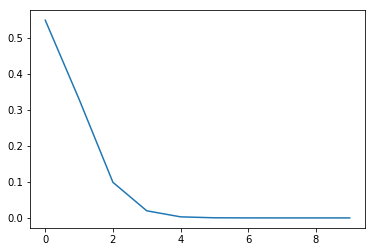

In [51]:
ne = np.arange(0,10)
pe = list(map(lambda e: mi_poisson.pmf(e), ne))
plt.plot(ne, pe)
plt.show()

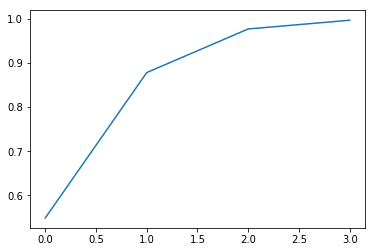

In [92]:
ne = np.arange(0,4)
pe = list(map(lambda e: mi_poisson.cdf(e), ne))
plt.plot(ne, pe)
plt.show()

## Exo

En un puesto de feria se ofrece la posibilidad de lanzar a ciegas un
dardo a unos globos. Si se consigue reventar un globo, se recibe un premio igual a
una cantidad oculta tras el globo. Supongamos que la probabilidad de acertar con
algún globo es 1/3.
Los premios se distribuyen de la siguiente manera:
* 40 % de premios de 0,50 euros
* 30 % de premios de 1 euros
* 20 % de premios de 2 euros
* 10 % de premios de 6 euros


Si cada lanzamiento cuesta 1 euro, ¿cuál es la "ganancia.esperada del dueño del
puesto en cada lanzamiento?


In [86]:
ganancias = np.array([1, 0.5, 0, -1, -5])
probab = np.array([1/3, 0.4*2/3, 0.3*2/3, 0.2*2/3, 0.1*2/3])
result = sum(probab * ganancias)
print("%.2f" %(result))

0.00


## Exo

Una prueba consta de 200 preguntas de verdadero o falso, para un
alumno que responde al azar.
1. ¿Cuál es la probabilidad de que acierte como máximo 50 preguntas?
2. ¿Cuál es la probabilidad de que acierte más de 50 y menos de 100 preguntas?
3. ¿Cuál es la probabilidad de que acierte más 120 preguntas?


In [58]:
p = 0.5
n = 200
mi_binomial = stats.binom(n,p)
result = 100 * mi_binomial.cdf(50)
print("%.2f %s" %(result, "%"))

0.00 %


In [59]:
result = 100 * (mi_binomial.cdf(100) - mi_binomial.cdf(50))
print("%.2f %s" %(result, "%"))

52.82 %


In [60]:
result = 100 * (1 - mi_binomial.cdf(120))
print("%.2f %s" %(result, "%"))

0.18 %


## Variable aleatoria continua

## Exo

Supongamos que el consumo familiar de un cierto producto se distribuye
como una variable aleatoria de distribución uniforme, con esperanza igual a 10 y
varianza igual a 1. Determine la probabilidad de que dicho consumo esté comprendido
entre 8 y 12 unidades.

In [118]:
import math

In [122]:
mi_uniforme = stats.uniform(loc = 10-math.sqrt(3), scale = 2*math.sqrt(3))

In [123]:
mi_uniforme.mean()

10.0

In [124]:
mi_uniforme.var()

0.99999999999999989

In [125]:
result = 100 * (mi_uniforme.cdf(12) - mi_uniforme.cdf(8))
print("%.2f %s" %(result, "%"))

100.00 %


In [126]:
from sympy import *

In [127]:
a=Symbol("a")
b=Symbol("b")

In [132]:
solve([(a+b)/2-10,((b-a)**2)/12-1])

[{a: -sqrt(3) + 10, b: sqrt(3) + 10}, {a: sqrt(3) + 10, b: -sqrt(3) + 10}]